# Advance 자료 2: CutMix

`Cutmix`는 더욱 최신의 기술입니다.

`Cutout`이라는 기술과 `Mixup`의 기술을 결합하여 만든 기술입니다.

- `Cutout`: Region 기반의 dropout 방식입니다. 모델의 분류 성능을 높이는데 기여한다는 사실이 알려져있습니다. 하지만, 임의로 Region을 자르는 것이기 때문에 정보손실이 생깁니다.

![cutout](./imgs/cutout.png)

- 위처럼 잘려나가는 region을 대신하여 다른 이미지의 사진을 붙이는 것입니다. 그리고 label은 영역의 넓이에 비례하게 주는 것입니다.

![cutmix](./imgs/cutmix.png)

In [1]:
import torch
import copy
from torch import cuda, nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = ??????????????
    bby1 = ??????????????
    bbx2 = ??????????????
    bby2 = ??????????????

    return bbx1, bby1, bbx2, bby2

In [9]:
def cutmix(images, labels, device, alpha = 1.0):
    """
    cutmix function from 'CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features',
    https://arxiv.org/abs/1905.04899
    """
    
    #generate mixed sample
    lam = np.random.beta(alpha, alpha)
    rand_index = torch.randperm(images.size()[0]).to(device)
    labels_a = labels
    labels_b = labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(images.size(), lam)
    images[:, :, bbx1:bbx2, bby1:bby2] = ??????????????
    #adjust lambda to exactly match pixel ratio
    lam = ??????????????
    #compute output
    images = torch.autograd.Variable(images, requires_grad=True).to(device)

    return lam, images, labels_a, labels_b

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
def imshow(img):
    plt.rcParams["figure.figsize"] = (18,6)

    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

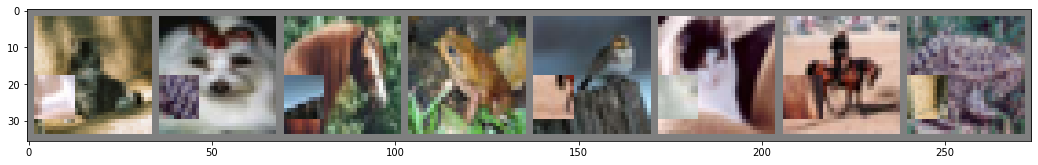

  cat   dog horse  frog  bird   cat horse  frog
  cat  frog  bird  frog horse   dog horse   cat
0.87109375


In [14]:
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()
lam, images, labels1, labels2 = cutmix(images, labels, 'cpu')

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels1[j]] for j in range(8)))
print(' '.join('%5s' % classes[labels2[j]] for j in range(8)))
print(lam)